In [426]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.ndimage

from chmp.ds import mpl_set, get_color_cycle
from chmp.experiment import Loop

# Chapter 1

## Polynomial Curve Fitting

Formula (1.4)

$$
    J = \frac{1}{2} \sum_n (w x^n - y^n)^2 + \frac{\lambda}{2} w^2
$$

Optimium at:

$$
\begin{eqnarray}
    \frac{\partial}{\partial w_i} J 
    &=& \sum_{nj} (w_j x^n_j - y^n) x_i + \lambda w_i \\
    &=& \sum_{jn} x^n_i x^n_j w_j - \sum_n y^n x^n_i + \lambda w_i
    &=& (X^T X + \lambda) w - X^T y
\end{eqnarray}
$$

with $X_{nj} = x^n_j$

Optimum at:

$$
    w^\star = (X^T X + \lambda)^{-1} X^T y
$$

In [3]:
def design_matrix(x, order=3):
    res = np.concatenate([x[None, :] ** n for n in range(order)])
    return res.T

def fit(X, y, lam):
    return np.linalg.inv(X.T @ X + lam) @ X.T @ y

(-2, 2)

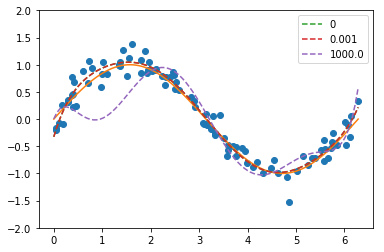

In [4]:
n_samples = 100
order = 8
regularization = [0, 1e-3, 1e3]

x = np.random.uniform(0, 2 * np.pi, size=n_samples)
y = np.random.normal(np.sin(x), scale=0.2)
ux = np.linspace(0, 2 * np.pi, 100)
uy = np.sin(ux)

plt.plot(x, y, 'o')
plt.plot(ux, uy)

for reg in regularization:
    plt.plot(ux, design_matrix(ux, order) @ fit(design_matrix(x, order), y, lam=reg), '--', label=f'{reg}')

plt.legend(loc='best')
plt.ylim(-2, 2)

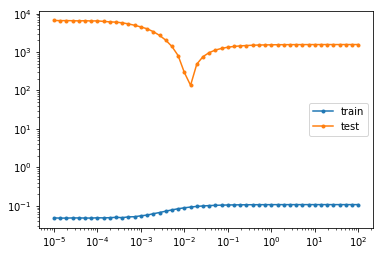

In [5]:
np.random.seed(21)

n_samples = 10
order = 9

x_train = np.random.uniform(0, 2 * np.pi, size=n_samples)
y_train = np.random.normal(np.sin(x_train), scale=0.2)

x_test = np.random.uniform(0, 2 * np.pi, size=1000)
y_test = np.random.normal(np.sin(x_test), scale=0.2)


regularization = np.logspace(-5, 2, 50)
rmse_train = []
rmse_test = []

for reg in regularization:
    w = fit(design_matrix(x_train, order), y_train, lam=reg)
    pred_train = design_matrix(x_train, order) @ w
    pred_test = design_matrix(x_test, order) @ w
    
    rmse_train.append(np.std(y_train - pred_train))
    rmse_test.append(np.std(y_test - pred_test))
    
plt.figure()
plt.plot(regularization, rmse_train, label='train', marker='.')
plt.plot(regularization, rmse_test, label='test', marker='.')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

## Probability theory

> In both the Bayesian and frequentist paradigms, the likelihood function p(D|w) plays a central role. 
> However, the manner in which it is used is fundamentally different in the two approaches. 
> In a frequentist setting, w is considered to be a fixed parameter, whose value is determined 
> by some form of ‘estimator’, and error bars on this estimate are obtained by considering the 
> distribution of possible data sets D. By contrast, from the Bayesian viewpoint there is only a 
> single data set D (namely the one that is actually observed), and the uncertainty in the 
> parameters is expressed through a probability distribution over w.

### Maximum Likelihood of Gaussian Distribution

$$
\begin{eqnarray}
    \hat{\mu} &=& \frac{1}{N} \sum_n x_n \\
    \hat{\sigma} &=& \frac{1}{N} \sum_n (x_n - \hat{\mu})^2
\end{eqnarray}
$$

Unbiased mean estimate:

$$
    \mathbb{E} \hat{mu} = \frac{1}{N} \sum_n \mathbb{E} x_n = \mu
$$

Biased variance estimate:

$$
\begin{eqnarray}
    \mathbb{E} \hat{\sigma} 
        &=& \frac{1}{N} \sum_n \mathbb{E} (x_n - \hat{\mu})^2 \\
        &=& \frac{1}{N} \sum_n  \mathbb{E} x_n^2 - \mathbb{E} \hat{\mu}^2) \\
        &=& \mu^2 + \sigma^2 - \frac{1}{N^2} \mathbb{E} \sum_{mn} x_n x_m \\
        &=& \mu^2 + \sigma^2 - \frac{1}{N^2} \sum_{mn} (\mu^2 + \delta_{nm} \sigma^2) \\
        &=& \sigma^2 - \frac{1}{N} \sigma^2 \\
        &=& \frac{N - 1}{N} \sigma^2
\end{eqnarray}
$$

## Model Selection

## The curse of dimensionality 

## Decision Theory

Naive Bayes for combining models. Assume two models for cancer prevalence based on images 
$P(C|x_I)$ and on blood tests $P(C|x_B)$. Assume given the class the joint factorizes as

$$
    P(C, x_I, x_B) = P(x_I|C) P(x_B|C) P(C)
$$

Note that for each model: $P(x_I|C) = P(C|x_I) / P(C)$

Bayes rule gives the posterior as:

$$
\begin{eqnarray}
    P(C| x_i, x_b) 
        &\propto& P(x_i|C) p(x_b|C) P(C) \\
        &=& P(C|x_I) p(C|x_B) / P(C)
\end{eqnarray}
$$

## Infomration theory

# Chapter 2

## Binary Variables

## Multinomial Variables

## The Gaussian distribution

Marginal and conditional Gaussians (see (2.113) - (2.117)):
    
$$
\begin{align}
    p(x) &= \mathcal{N}(x|\mu, \Lambda^{-1}) \\
    p(y|x) &= \mathcal{N}(y|A x + b, L^{-1}) \\
    p(y) &= \int \mathrm{d}x\; p(y|x)p(x) 
        = \mathcal{N}(y|A\mu + b, L^{-1} + A \Lambda^{-1} A^T) \\
    p(x|y) &= \frac{p(y|x)p(x)}{p(y)} 
        = \mathcal{N}(y|\Sigma \left\{ A^T L (y - b) + \Lambda \mu \right\}, \Sigma) \\
    \Sigma &= \left( \Lambda  + A^T L A \right)^{-1}
\end{align}
$$

### Bayesian Inference for Gaussians

$$
\begin{eqnarray}
    p(\{x\}|\mu) &\propto& \exp\left[ - \frac{1}{2 \sigma^2} \sum_n (x_n - \mu)^2 \right] \\
    p(\mu|\mu_0, \sigma_0) &\propto& \exp\left[ - \frac{1}{2 \sigma_0^2} (\mu - \mu_0)^2 \right] \\
    p(\mu|\{x\}) &=& \frac{p(\{x\}|\mu) p(\mu|\mu_0, \sigma_0)}{p(\{x\})}
\end{eqnarray}
$$

The posterior is given by
$$
\begin{eqnarray}
    -\log p(\mu|\{x\}) &=& 
        \frac{1}{2 \sigma^2} \sum_n (x_n - \mu)^2 +
        \frac{1}{2 \sigma_0^2} (\mu - \mu_0)^2 +
        \mathrm{const} 
\\
    &=& 
        \frac{1}{2 \sigma^2} \sum_n \mu^2 + \frac{1}{2 \sigma_0^2} \mu^2 +
        \frac{1}{\sigma^2} \sum_n x_n \mu + \frac{1}{\sigma_0^2} \mu_0 \mu +
        \mathrm{const} 
\\
    &=&
        \frac{1}{2 \sigma^{\prime2}} \mu^2 + \frac{1}{\sigma^{\prime^2}} \mu^\prime \mu + \mathrm{const}
\end{eqnarray}
$$

With:

$$
\begin{eqnarray}
    \sigma^{\prime2}
        &=& \left( \frac{1}{\sigma^2} \sum_n + \frac{1}{\sigma_0^2}  \right)^{-1} 
        &=& \left( \frac{\sigma_0^2 N + \sigma^2}{\sigma_0^2 \sigma^2} \right)^{-1} 
        &=& \frac{\sigma_0^2 \sigma^2}{\sigma_0^2 N + \sigma^2} 
        &=& \frac{\sigma_0^2}{1 + N \sigma_0^2 / \sigma^2}
\end{eqnarray}
$$

and

$$
\begin{eqnarray}
    \mu^\prime 
        &=& \frac{\sigma^{\prime^2}}{\sigma^2} \sum_n x_n + \frac{\sigma^{\prime^2}}{\sigma_0^2} \mu_0
        &=& \frac{\sigma^{\prime^2}}{\sigma^2} X + \frac{\sigma^{\prime^2}}{\sigma_0^2} \mu_0
        &=& \frac{\sigma_0^2 X + \sigma^2 \mu_0}{\sigma_0^2 N + \sigma^2}
        &=& \frac{\sigma_0^2 N \bar{x} + \sigma^2 \mu_0}{\sigma_0^2 N + \sigma^2}
\end{eqnarray}
$$

Note that for $N \rightarrow 0$:

$$
\begin{eqnarray}
    \sigma^{\prime2} &\rightarrow& \sigma_0
    &\quad&
    \mu^\prime &\rightarrow& \mu_0
\end{eqnarray}    
$$

And for $N \rightarrow \infty$
$$
\begin{eqnarray}
    \sigma^{\prime2} &\rightarrow& 0
    &\quad&
    \mu^\prime &\rightarrow& \bar{x}
\end{eqnarray}    
$$

### TODO: Summarize Student + Normal-Gamma Sections

### Periodic Variables

Von Mises-Fischer Distribution:

$$
    p(x|\mu, \kappa) = 
        \frac{\kappa^{\nu}}{(2 \pi)^{\nu + 1} I_\nu(\kappa)} \exp \left[ \kappa \mu^T x \right]
$$

with $\nu = d / 2 - 1$. With $|\mu| = 1$. For maximum likelihood fitting note that:

$$
\begin{eqnarray}
    \mathcal{L} = p(\{x\}|\mu, \kappa) 
    &=& 
        \kappa \mu^T \sum_n x_n + N \log \kappa^{\nu} 
        - N\log I_\nu(\kappa) + \mathrm{const} 
\\
    \frac{\partial}{\partial \mu} \left( \mathcal{L} + \lambda (\mu^2 - 1) \right) 
    &=&
        \kappa \sum_n x_n + \lambda \mu = 0
\\
    \mu &=& \frac{\sum_n x_n}{|\sum_n x_n|} 
\\
    \frac{\partial}{\partial \kappa} \mathcal{L} 
    &=&
        \mu^T \sum_n x_n 
        - N \frac{\partial}{\partial \kappa} \log \kappa^{-\nu} I_\nu(\kappa) \\
    &=& \mu^T \sum_n x_n - N \frac{I_{\nu + 1}(\kappa)}{I_\nu(\kappa)} \\
    &=& |\sum_n x_n| - N \frac{I_{\nu + 1}(\kappa)}{I_\nu(\kappa)} = 0
\\
    \frac{I_{\nu + 1}(\kappa)}{I_\nu(\kappa)} &=& \frac{|\sum_n x_n|}{N}
\end{eqnarray}
$$

Note, the sign of $\mu$ stems from the maximization of the likelihood and the following identity was used:

$$
    \frac{\partial}{\partial \kappa} \left[ \kappa^{-\nu} I_\nu(\kappa) \right] =
    \kappa^{-\nu} I_{\nu + 1}(\kappa).
$$

The equation for $\kappa$ can be be solved, e.g., by bisection search.

In [9]:
def vonmises_pdf(x, mu, kappa):
    return np.exp(kappa * (np.cos(x - mu) - 1)) / (2.0 * np.pi * scipy.special.ive(0, kappa))


def vonmises_fit(x):
    mu_est = np.arctan2(np.mean(np.sin(x)), np.mean(np.cos(x)))
    return mu_est, bisect_kappa(np.mean(np.cos(x - mu_est)))


def bisect_kappa(x):
    """Bisect the solution to ``I_1(kappa) / I_0(kappa) = x``
    """
    def eval(kappa):
        return scipy.special.ive(1, kappa) / scipy.special.ive(0, kappa)
    
    lower = -8
    upper = +8
    
    if x > eval(10 ** upper): return 10 ** upper
    if x < eval(10 ** lower): return 10 ** lower
    
    # perform logarithmic search
    for _ in range(10):
        cand = lower + 0.5 * (upper - lower)
        val = eval(10 ** cand)
        
        if val > x: upper = cand
        if val < x: lower = cand
        
        if (upper - lower) < 1:
            break
    
    # perform linear search
    lower = 10 ** lower
    upper = 10 ** upper
    
    for _ in range(20):
        cand = lower + 0.5 * (upper - lower)
        val = eval(cand)
        
        if val > x: upper = cand
        if val < x: lower = cand
        
    cand = lower + 0.5 * (upper - lower)
    return cand


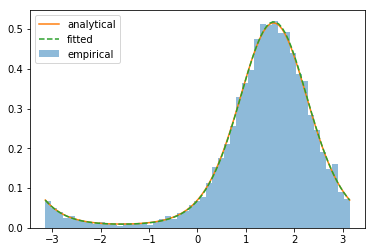

In [10]:
n_samples = 10_000
mu = 0.5* np.pi
kappa = 2

x = np.random.vonmises(mu, kappa, size=n_samples)
mu_est, kappa_est = vonmises_fit(x)

u = np.linspace(-np.pi, +np.pi, 100)
plt.hist(x, bins=51, normed=True, label='empirical', alpha=0.5)
plt.plot(u, vonmises_pdf(u, mu, kappa), label='analytical')
plt.plot(u, vonmises_pdf(u, mu_est, kappa_est), label='fitted', ls='--')
plt.legend(loc='best')
pass

## The exponential family

$$
\begin{eqnarray}
    p(x|\eta) &=& h(x) g(\eta) \exp \eta^T u(x) \\
    p(\eta|\nu, \chi) &=& f(\chi, \nu) g(\eta)^\nu \exp \nu \eta^T \chi
\end{eqnarray}
$$

Posterior:

$$
\begin{eqnarray}
    p(\eta|\{x\}) &=& \left( \prod_n p(x_n|\eta) \right) p(\eta|\nu, \chi) \\
        &\propto& 
            g(\eta)^N \exp \left( \eta^T \sum_n u(x_n) \right)
            g(\eta)^\nu \exp \nu \eta^T \chi \\
        &=& 
            g(\eta)^{\nu + N} \exp \left( (\nu + N) \frac{\nu \chi + \sum_n u(x_n)}{\nu + N} \right) \\
    p(\eta|\{x\}) &=& p(\eta|\nu^\prime, \chi^\prime) \\
    \nu^\prime &=& \nu + N \\
    \chi^\prime &=& \frac{\nu \chi + \sum_n u(x_n)}{\nu + N}
\end{eqnarray}
$$

### Maximum likelihood for exponential family

$$
\begin{eqnarray}
    \mathcal{L} &=& \sum_n \log p(x_n|\eta) 
\\
    &=& \sum_n \eta^T u(x_n) + N \log g(\eta) + \mathrm{const}
\\
    \frac{\partial}{\partial \eta} \mathcal{L} &=&
        \sum_n u(x_n) + N \frac{\partial}{\partial \eta} \log g(\eta) = 0
\\
    -\frac{\partial}{\partial \eta} \log g(\eta) &=& \frac{1}{N} \sum_n u(x_n)
\end{eqnarray}
$$


For the Gaussian:

$$
\begin{eqnarray}
    p(x|\eta) = g(\eta) \exp\left[ \eta_1 u_1(x) + \eta_2 u_2(x) \right]
\\
    \eta_1 = \frac{\mu}{\sigma^2},\; \eta_2 = \frac{-1}{2 \sigma^2}
\\
    u_1(x) = x,\; u_2(x) = x^2 
\\
    -\log g(\eta) = \frac{1}{2} \log \pi - \frac{1}{2} \log -\eta_2 - \frac{1}{4} \frac{\eta_1^2}{\eta_2}
\\
    -\log \frac{\partial}{\partial \eta_1} g(\eta) = \mu 
\\
    -\log \frac{\partial}{\partial \eta_2} g(\eta) = \mu^2 + \sigma^2
\end{eqnarray}
$$

For Bernoulli

$$
\begin{eqnarray}
    p(x|\mu) &=& \mu^x (1 - \mu)^{1 - x}  = \left( \frac{\mu}{1 - \mu} \right)^x \left( 1 - \mu \right)
\\
    &=& g(\eta) \exp \eta x
\\
    \eta &=& \log \frac{\mu}{1 - \mu} 
\\
    g(\eta) &=& \sigma(-\eta)
\\
    -\frac{\partial}{\partial \eta} \log g(\eta) 
        &=& \frac{1}{\sigma(-\eta)} \sigma(\eta) \sigma(-\eta) = \sigma(\eta) = \mu
\end{eqnarray}
$$

# Linear models for regression

## Linear Basis Function Models

### The Bias Variance Decomposition

## Bayesian linear regression

Prior for $L_q$ regularization in 1 dimension (p. 156):

$$
    p(w|\alpha) = 
        \frac{q}{2} \left( \frac{\alpha}{2} \right)^{1/q} \frac{1}{\Gamma(1/q)}
        \exp \left( -\frac{\alpha}{2} |w|^q \right)
$$


### Gaussian likelihood + known variance

$$
\begin{align}
    &\text{likelihood} &\;
    &p(t|\phi, w, \beta) = \mathcal{N}(t|w^T \phi, \beta^{-1})
\\
    &\text{prior} &\;
    &p(w|m_0, \alpha) = \mathcal{N}(w|m_0, \alpha^{-1})
\\
    &\text{posterior} &\;
    &p(w|\{t, \phi\}) = \mathcal{N}(w|m_N, S_N)
\\
    &\; &\;
    &m_N = S_N \left( \alpha m_0 + \beta \Phi^t T \right)
\\
    &\; &\;
    &S_N^{-1} = \alpha + \beta \Phi^T \Phi
\\
    &\text{predictive} &\;
    &p(t|\phi, \{y, \phi\}) = \mathcal{N}(t|m_N^T \phi, \sigma_N^2)
\\
    &\; &\;
    &\sigma_N^2 = \beta^{-1} + \phi^T S_N \phi
\end{align}
$$

Note, these equations are also valid if $\alpha$ is a matrix.

Note, notation is unified with Sec. 3.5 ($S_0^{-1} \rightarrow \alpha$).

In [243]:
# TODO: check for inverse of alpha? does the definition match up?
def update_posterior(params, observed, beta):
    m, s = params
    x, y = observed
    
    s_new = np.linalg.inv(np.linalg.inv(s) + beta * x @ x.T)
    m_new = s_new @ (np.linalg.inv(s) @ m + beta * x @ y)
    
    return m_new, s_new


def eval_predictive(x, params, beta):
    m, s = params
    return (
        m.T @ x, 
        # TODO: optimize the diag part
        1.0 / beta + np.diag(x.T @ s_N @ x)
    )


def empirical_bayes(observed, alpha, beta):
    x, y = observed
    N, M = x.shape
    lam = np.linalg.eigvals(x_eval @ x_eval.T) 
    
    for _ in range(10):
        m_0, s_0 = np.zeros(M), np.diag([1 / alpha] * M)
        m_N, s_N = update_posterior(params_0, observed, beta)
    
        gamma = np.sum(lam / (lam + alpha))
        alpha = gamma / (m_N.T @ m_N)
        beta = np.sum((y - m_N.T @ x) ** 2.0) / (N - gamma)
    
    return (m_N, s_N), alpha, beta
    
    
def plot_gaussian2d(m, s, extent, bins=(10, 10)):
    # TODO: normalize s
    x = np.linspace(extent[0][0], extent[0][1], bins[0])
    y = np.linspace(extent[1][0], extent[1][1], bins[1])
    x, y = np.meshgrid(x, y)
    
    m_x, m_y = m
    (t_xx, t_xy), (t_yx, t_yy) = np.linalg.inv(s_N)
    
    norm = 1 / (2.0 * np.pi * np.linalg.det(s) ** 0.5)
    
    p = norm * np.exp(-0.5 * (
        t_xx * (x - m_x) * (x - m_x) + 
        t_xy * (x - m_x) * (y - m_y) + 
        t_yx * (y - m_y) * (x - m_x) + 
        t_yy * (y - m_y) * (y - m_y)
    ))
    
    plt.imshow(
        p,
        extent=[extent[0][0], extent[0][1], extent[1][0], extent[1][1]], 
        origin='lower',
        aspect='auto',
    )

In [261]:
# Example (see fig. 3.7)
# beta = 25, alpha = 1 / 2.0

w_true = np.asarray([-0.3, 0.5])

np.random.seed(241)

n_samples = 20
x_obs = np.stack([np.ones(n_samples), np.random.uniform(low=-1, high=+1, size=n_samples)])
y_obs = np.random.normal(w_true.T @ x_obs, scale=0.2)

x_eval = np.stack([np.ones(100), np.linspace(-1, 1, 100)])

In [262]:
beta = 25
alpha = 1 / 2.0
params_0 = np.zeros(2), np.diag([1 / alpha, 1 / alpha])
m_N, s_N = update_posterior(params_0, (x_obs, y_obs), beta)
p_m, p_s = eval_predictive(x_eval, (m_N, s_N), beta)

(m_emp, s_emp), alpha_emp, beta_emp = empirical_bayes((x_obs, y_obs), alpha, beta)

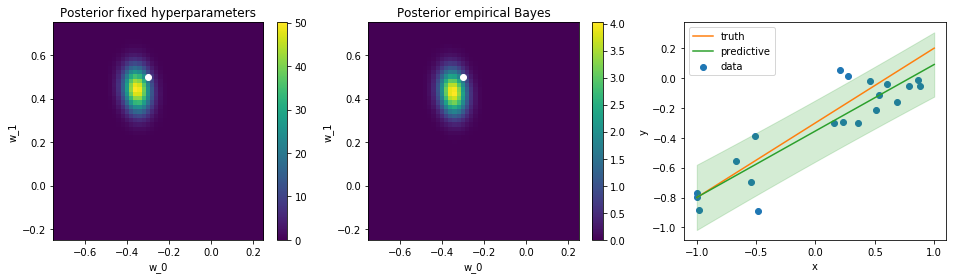

In [263]:
c0, c1, c2 = get_color_cycle(3)

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plot_gaussian2d(m_N, s_N, extent=[[-0.75, +0.25], [-0.25, +0.75]], bins=(50, 50))
plt.plot([w_true[0]], [w_true[1]], 'wo')
mpl_set(xlabel='w_0', ylabel='w_1', colorbar=True, title='Posterior fixed hyperparameters')

plt.subplot(1, 3, 2)
plot_gaussian2d(m_emp, s_emp, extent=[[-0.75, +0.25], [-0.25, +0.75]], bins=(50, 50))
plt.plot([w_true[0]], [w_true[1]], 'wo')
mpl_set(xlabel='w_0', ylabel='w_1', colorbar=True, title='Posterior empirical Bayes')

plt.subplot(1, 3, 3)
plt.scatter(x_obs[1, :], y_obs, color=c0, label='data')
plt.plot(x_eval[1, :], w_true.T @ x_eval, color=c1, label='truth')
plt.plot(x_eval[1, :], p_m, label='predictive', color=c2)
plt.fill_between(x_eval[1, :], p_m - p_s ** 0.5, p_m + p_s ** 0.5, color=c2, alpha=0.2)

mpl_set(xlabel='x', ylabel='y', legend=True)
pass

## Bayesian model comparison

Assume mutliple models $\mathcal{M}_i$ under investigation. The posterior for the model is given by

$$
\begin{align}
    \color{red}{p(\mathcal{M}_i|\mathcal{D})} &= 
        \frac{P(\mathcal{M}_i) \color{blue}{p(\mathcal{D}|\mathcal{M}_i)}}{p(\mathcal{D})}
    &\; &\;
\\
    p(t|x, \mathcal{D}) &= \sum_i p(t|x, \mathcal{M}_i, \mathcal{D}) \color{red}{p(\mathcal{M}_i|\mathcal{D})}
    &\; &\;
\\
    \log \color{blue}{p(\mathcal{D}|\mathcal{M}_i)} &= 
        \log \int \mathrm{d}w\; p(\mathcal{D}|w, \mathcal{M}_i) p(w|\mathcal{M}_i) 
    &\; &\;
\\
    &\approx \log  \Delta w_\mathrm{posterior} \log  p(\mathcal{D}|w_\mathrm{MAP}, \mathcal{M}_i)  
    p(w_\mathrm{MAP}|\mathcal{M}_i)
    &\; &\text{strongly peaked posterior}
\\
    &\approx \log  p(\mathcal{D}|w_\mathrm{MAP}, \mathcal{M}_i) +
        \log \frac{\Delta w_\mathrm{posterior} }{\Delta w_\mathrm{prior}}
    &\; &\text{flat prior}
\\
    &\approx \log p(\mathcal{D}|w_\mathrm{MAP}, \mathcal{M}_i) +
        M \log \frac{\Delta w_\mathrm{posterior} }{\Delta w_\mathrm{prior}}
    &\; &\text{for M parameters}
\end{align}
$$

For flat model prior $p(\mathcal{M}_i) = \mathrm{const}$ the relevant quantity is only the model evidence (or marginal likelihood) $\color{blue}{p(\mathcal{D}|\mathcal{M}_i)}$ is relevant.  

Note that, in the approximation above, the model evidence is the sum between a likelihood term (how good the data is fitted) and a complexity term (how many parameters are included). This form favors a model that is complex enough to fit the data, but not too complex.

When approximating the predictive distribution by the most likely model, on selects on average the correct model, as can be seen as follows: Assume the correct model is $\mathcal{M}^\star$, then the average of the log model evidence is equal to

$$
    \mathbb{E}_\mathcal{D} \log p(\mathcal{D}|\mathcal{M}_i) =
    \int \mathrm{d} \mathcal{D}\; p(\mathcal{D}|\mathcal{M}^\star) 
        \log \frac{p(\mathcal{D}|\mathcal{M}^\star)}{p(\mathcal{D}|\mathcal{M}_i)} + \mathrm{const}
$$

I.e., it is equal to the KL divergence to the correct model, which is minimized for the correct model choice.

## The Evidence Approximation

Marginalize over some parameters and choose the maximum likelihood value for the other paramters. Also called Empircal Bayes. For example: marginalize over the weights, but determie the scale parameters by maximizing the marginal likelihood.

$$
    p(\alpha, \beta|\mathcal{D}) \propto p(\mathcal{D}| \alpha, \beta) p(\alpha, \beta)
$$

Assume flat prior and search for $\alpha, \beta$ that maximize the marginal data likelihood

$$
    p(\mathcal{D}| \alpha, \beta) = 
        \int\mathrm{d}w\; p(\mathcal{D}| \mathcal{w}, \beta)p(\mathcal{w}|\alpha)
$$

Note, that both $\alpha$ and $\beta$ are scalar here.

The maximum is given by

$$
\begin{align}
    \gamma &= \sum_i \frac{\lambda_i}{\lambda_i + \alpha} \\
    \alpha &= \frac{\gamma}{m_N^T m_N} \\
    \beta^{-1} &= \frac{1}{N - \gamma} \sum_n \left( t_n - m_N^T \phi_n \right)^2
\end{align}
$$

In principle it would also be possible to first margininalize out the scale parameters and the approximate in the weight variables. However, empirically this leads to poorer results.

## Limitations of Fixed Basis Functions

# Linear Models for classification

## Discriminant Functions

### Fischer's Linear Discriminant

In [370]:
n_samples = 200 

y = np.random.binomial(1, p=0.5, size=n_samples)
mu = np.asarray([[-1, 0.5], [1, 0]])
sigma = np.asarray([
    [[+0.65, +0.35],
     [+0.35, +0.65]],
    [[+0.75, +0.35],
     [+0.35, +0.75]],
])

x = mu[y] + np.einsum('ij...,ij...->i...', sigma[y], np.random.normal(size=(n_samples, 2)))

simple_w = np.mean(x[y == 0], axis=0) - np.mean(x[y == 1], axis=0)
simple_w = simple_w / (simple_w @ simple_w) ** 0.5

delta_0 = x[y == 0] - np.mean(x[y == 0], axis=0, keepdims=True)
delta_1 = x[y == 1] - np.mean(x[y == 1], axis=0, keepdims=True)
S_w = delta_0.T @ delta_0 + delta_1.T @ delta_1

fischer_w = np.linalg.pinv(S_w) @ simple_w
fischer_w = fischer_w / (fischer_w @ fischer_w) ** 0.5

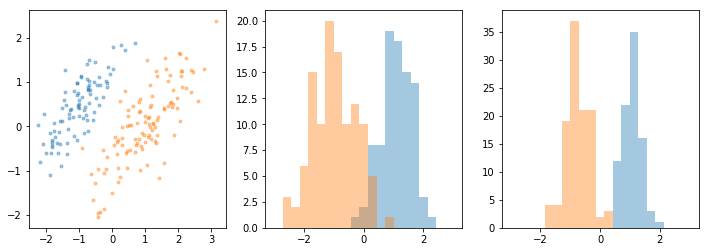

In [379]:
c0, c1 = get_color_cycle(2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x[y == 0, 0], x[y == 0, 1], color=c0, alpha=0.4, marker='.')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color=c1, alpha=0.4, marker='.')

plt.subplot(1, 3, 2)
plt.hist(x[y == 0] @ simple_w, alpha=0.4, range=(-3, +3), bins=21, color=c0)
plt.hist(x[y == 1] @ simple_w, alpha=0.4, range=(-3, +3), bins=21, color=c1)

plt.subplot(1, 3, 3)
plt.hist(x[y == 0] @ fischer_w, alpha=0.4, range=(-3, +3), bins=21, color=c0)
plt.hist(x[y == 1] @ fischer_w, alpha=0.4, range=(-3, +3), bins=21, color=c1)
pass

### Perceptron Algorithm

In [394]:
n_samples = 200 

y = np.random.binomial(1, p=0.5, size=n_samples)
mu = np.asarray([[-1, 0.5], [1, 0]])
sigma = np.asarray([
    [[+0.65, +0.35],
     [+0.35, +0.65]],
    [[+0.75, +0.35],
     [+0.35, +0.75]],
])

x = mu[y] + np.einsum('ij...,ij...->i...', sigma[y], np.random.normal(size=(n_samples, 2)))
x = np.concatenate([np.ones(n_samples)[:, None], x], axis=1)

y = 2 * y - 1

In [423]:
w = np.random.normal(loc=1e-2, size=3)
accuracy = []

for loop, _ in Loop.over(range(10)):
    idx = np.arange(n_samples)
    np.random.shuffle(idx)
    for i in idx:
        if y[i] * np.sign(x[i, :] @ w):
            w += y[i] * x[i, :]
    
        errors += [np.mean(y * np.sign(x @ w) + 1) / 2]
    print(f'{loop}'.ljust(20), end='\r')

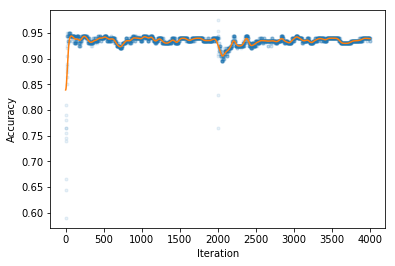

In [434]:
plt.plot(errors, '.', alpha=0.1)
plt.plot(scipy.ndimage.gaussian_filter(errors, 20), '-')
mpl_set(ylabel='Accuracy', xlabel='Iteration')

## Probabilistic Generative Models

# Misc

## Partial dependence

$$
\begin{eqnarray}
    p(y|x_i) 
        &=& \int\mathrm{d}x_{-i}\; p(y|x_i, x_{-i}) p(x_{-i})
\\
        &=& \int\mathrm{d}x_{-i}\; p(y|x_i, x_{-i}) \int \mathrm{d}x_i\; p(x_i, x_{-i})
\\
        &\approx& 
            \int\mathrm{d}x_{-i}\; p(y|x_i, x_{-i}) 
            \int \mathrm{d}x_i\; \frac{1}{N} \sum_n \prod_j \delta(x_j - x_j^n)
\\
        &=&
            \frac{1}{N} \sum_n \int\mathrm{d}x_{-i}\; p(y|x_i, x_{-i}) \prod_{j \neq i} \delta(x_j - x_j^n)
\\
        &=& \frac{1}{N} \sum_n p(y|x_i, x_{-i}^n)
\end{eqnarray}
$$
